# CKD 환자에서 CLI/PAD 유무에 따른 변수 분석

## Table of Contents

* [데이터전처리](#데이터-전처리)
* [데이터 탐색](#데이터-탐색)
    * [Demographic Data](#Demographic-data)
* [분석1 : CLI 에 따른 demographic data 비교 검정](#분석-1)
* [분석2 : CLI 에 따른 lab data 비교 검정](#분석-2)
* [분석3 : PAD 에 따른 lab data 비교 검정](#분석-3)
* [분석4 : CKD 수준별 CLI 에 따른 lab data 비교 검정](#분석-4)

### Study group의 구분
Column G 는 CKD without CLI 인 환자 및 CKD with CLI 환자를 구분한 Group 입니다.
- Group 3: CKD 3 without CLI
- Group 4: CKD 4 without CLI
- Group 5: CKD 5 without CLI 
- Group 6: CKD 3 with CLI
- Group 7: CKD 4 with CLI
- Group 8: CKD 5 with CLI 

#### 1) 분석 1 

CLI 유무에 따른 demographic data (Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 복용) 의 차이를 보는 것이 분석 1 입니다.  

즉 [Group 3+4+5]와 [Group 6+7+8] 의 상기 변수의 차이를 통계적으로 분석하는 것이 필요합니다. 

#### 2) 분석 2

CLI 유무에 따른 lab data (Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF) 의 차이를 보는 것이 분석 2 입니다.

즉 [Group 3+4+5]와 [Group 6+7+8] 의 상기 변수의 차이를 통계적으로 분석하는 것이 필요합니다. 

#### 3) 분석 3

PAD 유무에 따른 lab data (Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF) 의 차이를 보는 것이 분석 3 입니다.
Column R은 PAD 유무를 표시하고 있습니다. 0 = None, 1= Exist 입니다. 

#### 4) 분석 4 

같은 CKD stage 지만 CLI 유무에 따라 lab data  (Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF) 의 차이를 보는 것이 분석 4 입니다.
- Group 3 vs Group 6
- Group 4 vs Group 7
- Group 5 vs Group 8 

---
## 데이터 전처리


In [23]:
# 데이터 불러오기
library(xlsx)
data <- read.xlsx("EPCinCKD_201802.xlsx", sheetIndex = 1)
# 필요한 데이터만 추출(이름, ID 제거, 150행까지)
data <- data[1:150,-c(1,2)]

In [24]:
# Column name 변경
colnames(data)[c(7, 13, 15, 16, 22)] <- c("HTN", "statin", "obesity", "PAD", "CD34.All")

head(data)
tail(data)
colnames(data)

Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
0,49.00000,1961-10-12,3,3,0,1,0,0,0,⋯,0,0,3.789457,1.450,0.1900,2.1000,1.6400,2.2900,31.432,1933.688
0,64.63611,1946-11-05,3,3,0,1,0,0,1,⋯,0,0,4.392872,6.674,0.1645,-0.0390,6.8385,0.1255,2.563,2139.464
0,38.88056,1972-03-02,3,3,0,0,0,0,0,⋯,0,0,3.704475,7.654,0.1715,0.4345,7.8255,0.6060,54.338,3092.584
1,61.50000,1949-12-08,3,3,1,1,0,0,0,⋯,1,1,6.167245,12.907,0.1740,0.2595,13.0810,0.4335,38.010,1877.869
1,69.29722,1942-05-07,3,3,0,1,0,0,0,⋯,1,1,5.879595,2.887,0.4690,-0.0955,3.3560,0.3735,81.725,1902.396
1,74.65000,1936-11-29,3,3,0,1,0,0,0,⋯,0,0,3.929069,5.296,0.1880,0.1035,5.4840,0.2915,195.327,2223.454


,Gender,Age,Birth.Date,CKD.class,Group,DM,HTN,ACS,CHF,CVA,⋯,obesity,PAD,Average.CFU,VEGF,CD34.VEGF,CD34,VEGF.All,CD34.All,VEGF.1,SDF.1
145,0,56,1954-07-15,5,8,1,1,1,0,0,⋯,0,0,3.044,0.3865,0.0875,0.0035,0.4740,0.0910,231.768,4313.722
146,1,63,1947-06-15,5,8,1,0,0,0,0,⋯,1,1,5.090,4.1670,0.2255,-0.0055,4.3925,0.2200,495.291,5311.477
147,0,71,1938-11-08,5,8,1,1,0,0,0,⋯,1,1,5.690,1.2190,0.1255,0.1955,1.3445,0.3210,62.777,3311.798
148,0,70,1940-01-20,5,8,1,1,1,0,1,⋯,1,1,5.554,1.7870,0.0795,-0.0045,1.8665,0.0750,277.927,7015.030
149,1,71,1940-10-08,5,8,1,1,0,0,0,⋯,0,0,3.684,2.1200,2.6090,10.3900,4.7290,12.9990,500.290,3461.473
150,1,48,1961-01-15,5,8,1,1,0,0,0,⋯,0,0,4.980,0.3135,0.2670,0.0425,0.5805,0.3095,NA,NA


[1] "Gender"      "Age"         "Birth.Date"  "CKD.class"   "Group"      
 [6] "DM"          "HTN"         "ACS"         "CHF"         "CVA"        
[11] "smoking"     "alcohol"     "statin"      "BMI"         "obesity"    
[16] "PAD"         "Average.CFU" "VEGF"        "CD34.VEGF"   "CD34"       
[21] "VEGF.All"    "CD34.All"    "VEGF.1"      "SDF.1"

In [21]:
# 범주형 변수, 데이터 타입 변경
# data$Gender <- factor(data$Gender, levels=c(0,1), labels =c("F","M"))

# for( key in c('DM', 'HTN', 'ACS', 'CHF', 'CVA', 'smoking', 'alcohol', 'statin', 'obesity', 'PAD') ){
#     data[key][,1] <- factor(data[key][,1])
# }

In [27]:
library(dplyr)

# CLI 변수 생성 : 0 = CLI 없음(Group3,4,5) / 1 = CLI 있음(Group6,7,8)
data <- data %>% mutate( CLI = as.numeric(Group>=5))

----
## 데이터 탐색


### Demographic data 

CLI 유무를 기준으로 나눈 집단에서 

Gender, Age, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, BMI, Statin 확인

In [54]:
# CLI 데이터 수 
cat( "\nCLI(group6+7+8) number : ", sum(data$CLI), "/ ", length(data$CLI),"\n")


library(dplyr)

# Demographic data
cat("\n\n<CLI 그룹에 따른 Demographic data 비교>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( gender.ratio = mean(Gender, na.rm = T),
            mean.Age = mean(Age, na.rm = T),
            DM.ratio = mean(DM, na.rm = T),
            HTN.ratio = mean(HTN, na.rm = T),
            ACS.ratio = mean(ACS, na.rm = T),
            CHF.ratio = mean(CHF, na.rm = T),
            CVA.ratio = mean(CVA, na.rm = T),
            smoking.ratio = mean(smoking, na.rm = T),
            alcohol.ratio = mean(alcohol, na.rm = T),
            statin.ratio = mean(statin, na.rm = T),
            mean.BMI = mean(BMI, na.rm = T),
            obesity.ratio = mean(obesity, na.rm = T),
            PAD.ratio = mean(PAD, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))



CLI(group6+7+8) number :  67 /  150 


<CLI 그룹에 따른 Demographic data 비교>


CLI,gender.ratio,mean.Age,DM.ratio,HTN.ratio,ACS.ratio,CHF.ratio,CVA.ratio,smoking.ratio,alcohol.ratio,statin.ratio,mean.BMI,obesity.ratio,PAD.ratio
0,0.57,65.13,0.42,0.94,0.12,0.01,0.16,0.59,0.33,0.60,24.30,0.41,0.40
1,0.63,63.32,0.69,0.81,0.23,0.08,0.09,0.36,0.08,0.22,23.21,0.35,0.34


1.5배~2배 정도: DM, smoking, ACS, CVA 

2배 이상:  CHF, alcohol, statin 

차이가 있어 보이는 후보군은 위와 같다. 

#### Age 와 BMI 의 분포 확인 

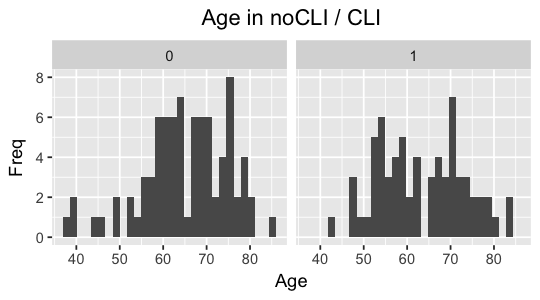

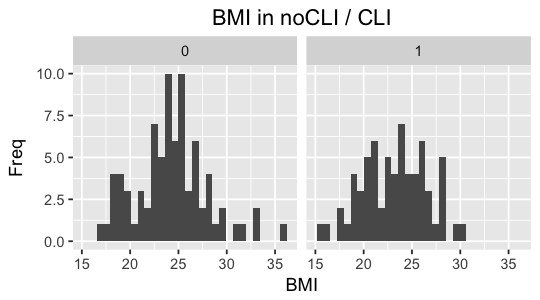

In [148]:
# 연속형 데이터 분포 확인
library(repr)
library(ggplot2)
options(repr.plot.width=4.5, repr.plot.height=2.5)

# CLI 집단에 따른 Age 분포 확인 
data %>% 
    ggplot(aes(x=Age)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("Age in noCLI / CLI") +
    labs(x="Age", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=Age, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity", binwidth = 2.5) +  
#     ggtitle("Age in noCLI / CLI") +
#     labs(x="Age", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

# CLI 집단에 따른 BMI 분포 확인
data %>% 
    ggplot(aes(x=BMI)) +
    geom_histogram(bins=30, na.rm = T) +  
    ggtitle("BMI in noCLI / CLI") +
    labs(x="BMI", y="Freq") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    facet_wrap(~ CLI)

# 겹친 그래프
# data %>% 
#     mutate(CLI.f = as.factor(CLI)) %>%
#     ggplot(aes(x=BMI, fill = CLI.f)) +
#     geom_histogram(alpha=0.5, position="identity",binwidth = 1) +  
#     ggtitle("BMI in noCLI / CLI") +
#     labs(x="BMI", y="Freq") +
#     theme(plot.title = element_text(hjust = 0.5))

CLI 그룹과 비 CLI 그룹에서 분포의 큰 차이는 없어보인다. 

### Lab data

CLI 혹은 PAD 유무를 기준으로 나눈 집단에서 

Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF 수치 확인


In [63]:
# CLI 그룹별 비교

cat("\n<CLI 그룹에 따른 Lab data 비교>\n")
data %>% 
    group_by( CLI ) %>%
    summarise( mean.Average.CFU = mean(Average.CFU, na.rm = T),
            mean.VEGF = mean(VEGF, na.rm = T),
            mean.CD34 = mean(CD34, na.rm = T),
            mean.VEGF.All = mean(VEGF.All, na.rm = T),
            mean.CD34.All = mean(CD34.All, na.rm = T),
            mean.VEGF.1 = mean(VEGF.1, na.rm = T),
            mean.SDF.1 = mean(SDF.1, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


<CLI 그룹에 따른 Lab data 비교>


CLI,mean.Average.CFU,mean.VEGF,mean.CD34,mean.VEGF.All,mean.CD34.All,mean.VEGF.1,mean.SDF.1
0,5.26,6.32,0.11,6.63,0.41,66.85,2390.31
1,4.91,3.37,0.50,3.69,0.82,123.24,3260.86


CFU 를 제외한 값들이 꽤 차이나보인다. 

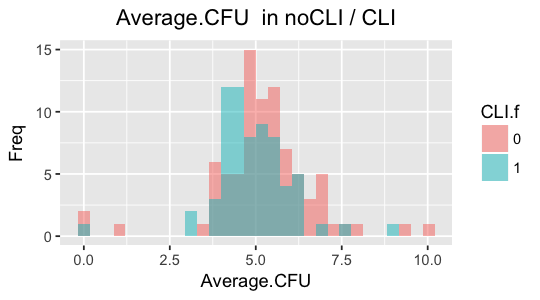

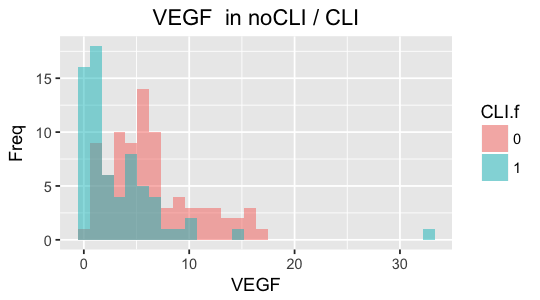

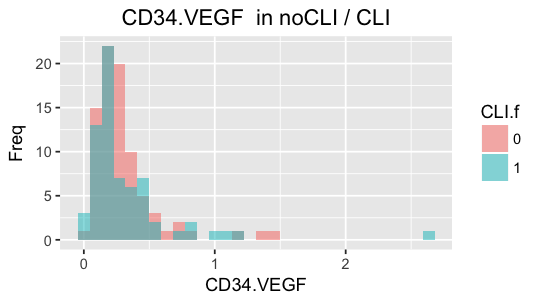

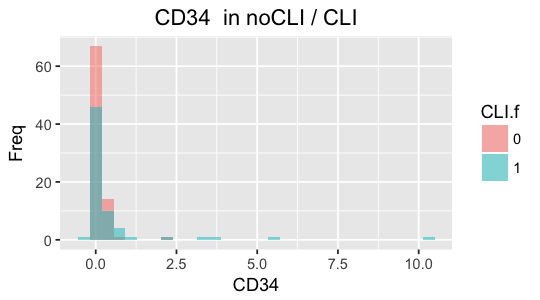

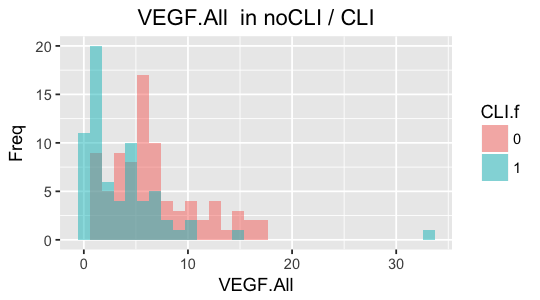

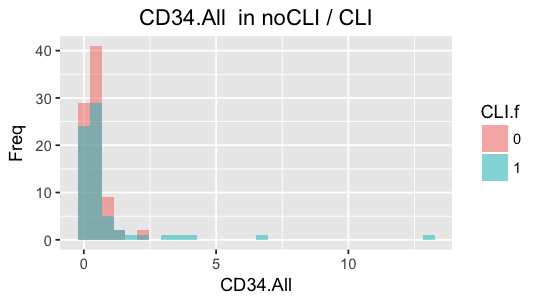

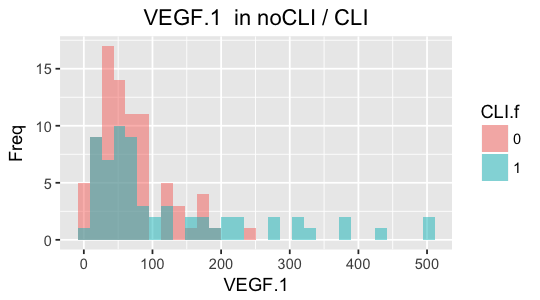

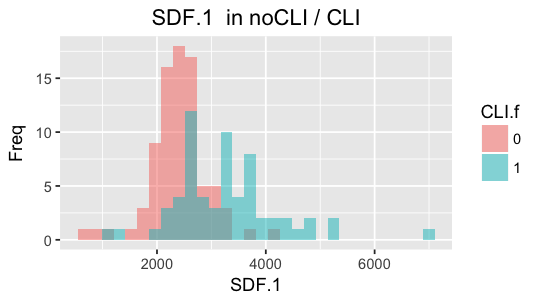

In [209]:
# 각각의 값에 대한 그래프 그리기

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){

    p<- data %>% 
        mutate(CLI.f = as.factor(CLI)) %>%
        ggplot(aes_string(x=key, fill = "CLI.f")) +
        geom_histogram(alpha=0.5, position="identity",bins = 30, na.rm = T) +  
        ggtitle(paste(key, " in noCLI / CLI")) +
        labs(x=key, y="Freq") +
        theme(plot.title = element_text(hjust = 0.5))
    
    print(p)
}




In [64]:
# PAD 그룹 별 비교 

cat("\n<PAD 그룹에 따른 Lab data 비교>\n")
data %>% 
    group_by( PAD ) %>%
    summarise( mean.Average.CFU = mean(Average.CFU, na.rm = T),
            mean.VEGF = mean(VEGF, na.rm = T),
            mean.CD34 = mean(CD34, na.rm = T),
            mean.VEGF.All = mean(VEGF.All, na.rm = T),
            mean.CD34.All = mean(CD34.All, na.rm = T),
            mean.VEGF.1 = mean(VEGF.1, na.rm = T),
            mean.SDF.1 = mean(SDF.1, na.rm = T)
             ) %>%
    mutate_if(is.numeric, funs(round(., 2)))


<PAD 그룹에 따른 Lab data 비교>


PAD,mean.Average.CFU,mean.VEGF,mean.CD34,mean.VEGF.All,mean.CD34.All,mean.VEGF.1,mean.SDF.1
0,4.50,4.63,0.42,4.96,0.75,92.25,2861.71
1,6.11,5.63,0.05,5.91,0.33,89.83,2611.55


CD34가 크게 차이나보인다. 

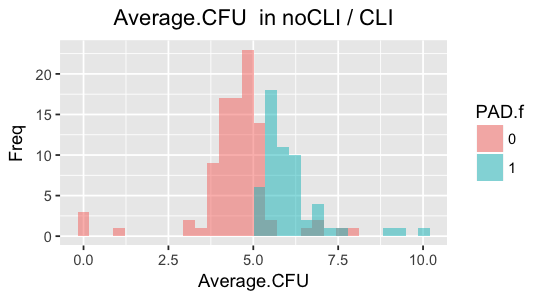

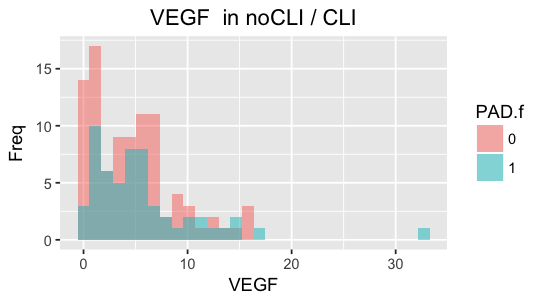

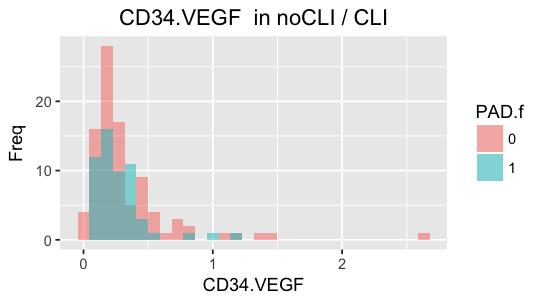

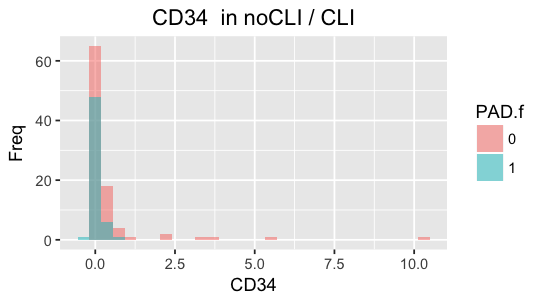

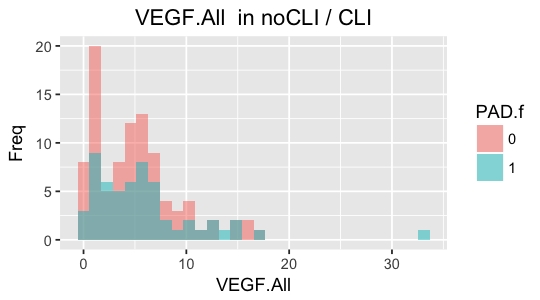

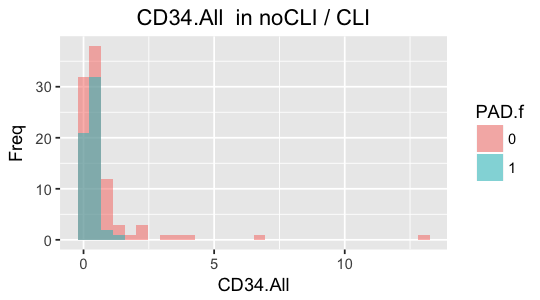

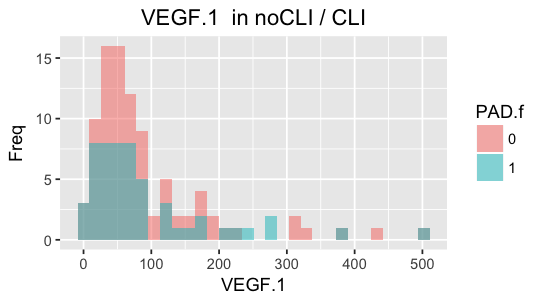

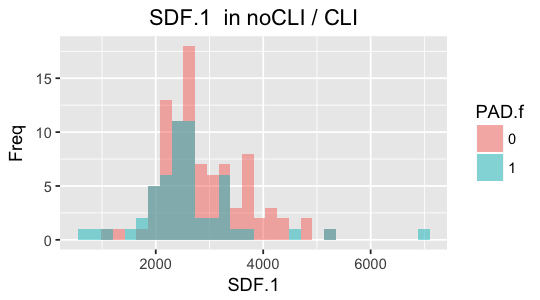

In [178]:
# 각각의 분포를 그려보기

for(key in c('Average.CFU', 'VEGF', 'CD34.VEGF', 'CD34', 'VEGF.All', 'CD34.All', 'VEGF.1', 'SDF.1')){

    p<- data %>% 
        mutate(PAD.f = as.factor(PAD)) %>%
        ggplot(aes_string(x=key, fill = "PAD.f")) +
        geom_histogram(alpha=0.5, position="identity",bins = 30, na.rm = T) +  
        ggtitle(paste(key, " in noCLI / CLI")) +
        labs(x=key, y="Freq") +
        theme(plot.title = element_text(hjust = 0.5))
    
    print(p)
}

---
## 분석 1

### CLI 집단과 비 CLI 집단 사이의 demographic 수치 비교

범주형 : Gender, DM, HTN, ACS, CHF, CVA, Smoking, Alcohol, obesity(BMI 기준 비만여부), Statin
    
    => Chi-square 분석

연속형 : Age, BMI

    => t-test 
    
다중분석이기 때문에 보정해야할 것 같은데, 방법좀 찾아봐야할듯
t-test 는 개수가 많아서 딱히 wilcoxon 안해도 될듯..? : 확인

In [210]:
for(key in c("DM", "HTN", "ACS", "CHF", "CVA", "smoking", "alcohol", "statin", "obesity", "PAD")){
    test <- chisq.test(data[key][,1], data["CLI"][,1])
    cat("\n", key, "~ CLI result : ", "\n   statistics = ", test$statistic, "\n   p-value = ", test$p.value, '\n')
}



 DM ~ CLI result :  
   statistics =  8.86614 
   p-value =  0.002905088 

 HTN ~ CLI result :  
   statistics =  4.202779 
   p-value =  0.04035779 

 ACS ~ CLI result :  
   statistics =  2.523011 
   p-value =  0.1121962 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 CHF ~ CLI result :  
   statistics =  2.116435 
   p-value =  0.1457254 

 CVA ~ CLI result :  
   statistics =  0.7167251 
   p-value =  0.3972202 

 smoking ~ CLI result :  
   statistics =  7.533263 
   p-value =  0.02312984 


Warning message in chisq.test(data[key][, 1], data["CLI"][, 1]):
“Chi-squared approximation may be incorrect”


 alcohol ~ CLI result :  
   statistics =  12.36015 
   p-value =  0.002070273 

 statin ~ CLI result :  
   statistics =  20.11862 
   p-value =  7.278468e-06 

 obesity ~ CLI result :  
   statistics =  0.3852833 
   p-value =  0.5347892 

 PAD ~ CLI result :  
   statistics =  0.2640427 
   p-value =  0.6073563 


In [204]:
fisher.test(data$CHF, data$CLI)
fisher.test(data$alcohol, data$CLI)


	Fisher's Exact Test for Count Data

data:  data$CHF and data$CLI
p-value = 0.09445
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   0.6677119 300.0724560
sample estimates:
odds ratio 
  6.198417 



	Fisher's Exact Test for Count Data

data:  data$alcohol and data$CLI
p-value = 0.0006257
alternative hypothesis: two.sided


In [206]:
t.test(Age~CLI, data = data)
t.test(BMI~CLI, data = data)


	Welch Two Sample t-test

data:  Age by CLI
t = 1.1076, df = 142.64, p-value = 0.2699
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.419474  5.037123
sample estimates:
mean in group 0 mean in group 1 
       65.13076        63.32193 



	Welch Two Sample t-test

data:  BMI by CLI
t = 1.8933, df = 143.08, p-value = 0.06033
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04826811  2.24077204
sample estimates:
mean in group 0 mean in group 1 
       24.30318        23.20693 


## 분석 2

### CLI 집단과 비CLI 집단 사이의 lab 수치 비교

Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF : 연속형 데이터

    => t-test

여러가지를 비교하기 때문에 다중 분석에 대한 보정 필요할것 

흠.. 정규분포를 따르는 것 같이 안생겼으니, t-test 보다는 wilcoxon rank sum 을 해야할수도 


In [ ]:
pairwise.t.test() 
pairwise.wilcox.test() 가 나을 수도 잇겠다. 

## 분석 3

### PAD 집단과 비PAD 집단 사이의 lab 수치 비교


Average CFU, VEGF, VEGF/CD34, CD34, SDF-1, VEGF : 연속형 데이터

    => t-test

여러가지를 비교하기 때문에 다중 분석에 대한 보정 필요할것 


## 분석 4